#  Cars24 Used Car Price Analysis

# This notebook analyzes the Cars24 dataset to identify the key factors affecting car prices in the used car market.

#  1. Import Libraries

In [1]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16

# ## 2. Load and Explore Data

# Load the dataset
df = pd.read_csv('/Users/yukaihuang/Downloads/cars24data.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)



Dataset shape: (1445, 11)

First 5 rows:
                            Model Name    Price  Manufacturing_year  \
0                2017 Maruti Swift VXI   561000                2017   
1  2016 Maruti Baleno DELTA PETROL 1.2   498000                2016   
2                2020 Maruti Swift VXI   577000                2020   
3       2022 Maruti Ertiga VXI AT SHVS  1084000                2022   
4                2019 Maruti Dzire VXI   603000                2019   

   Engine capacity Spare key Transmission  KM driven  Ownership Fuel type  \
0             1197        No       Manual      25847          2    Petrol   
1             1197       Yes       Manual      55511          2    Petrol   
2             1197        No       Manual      47110          1    Petrol   
3             1462       Yes    Automatic      35378          1    Petrol   
4             1197       Yes       Manual      91856          1    Petrol   

   Imperfections  Repainted Parts  
0              6                2

# Exploratory Data Analysis (EDA)

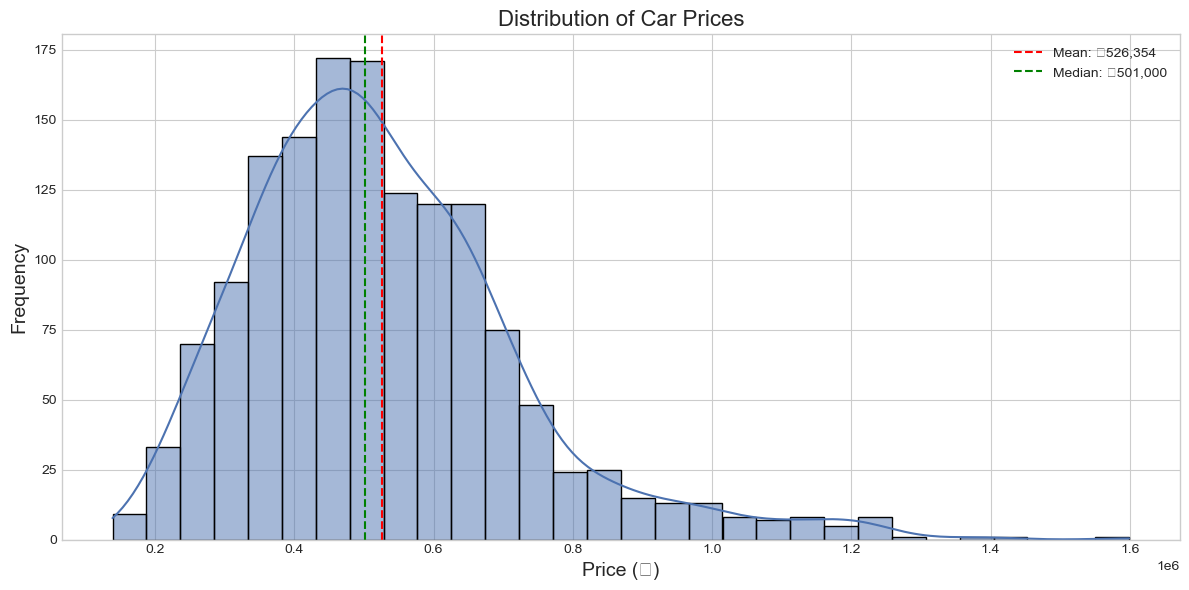

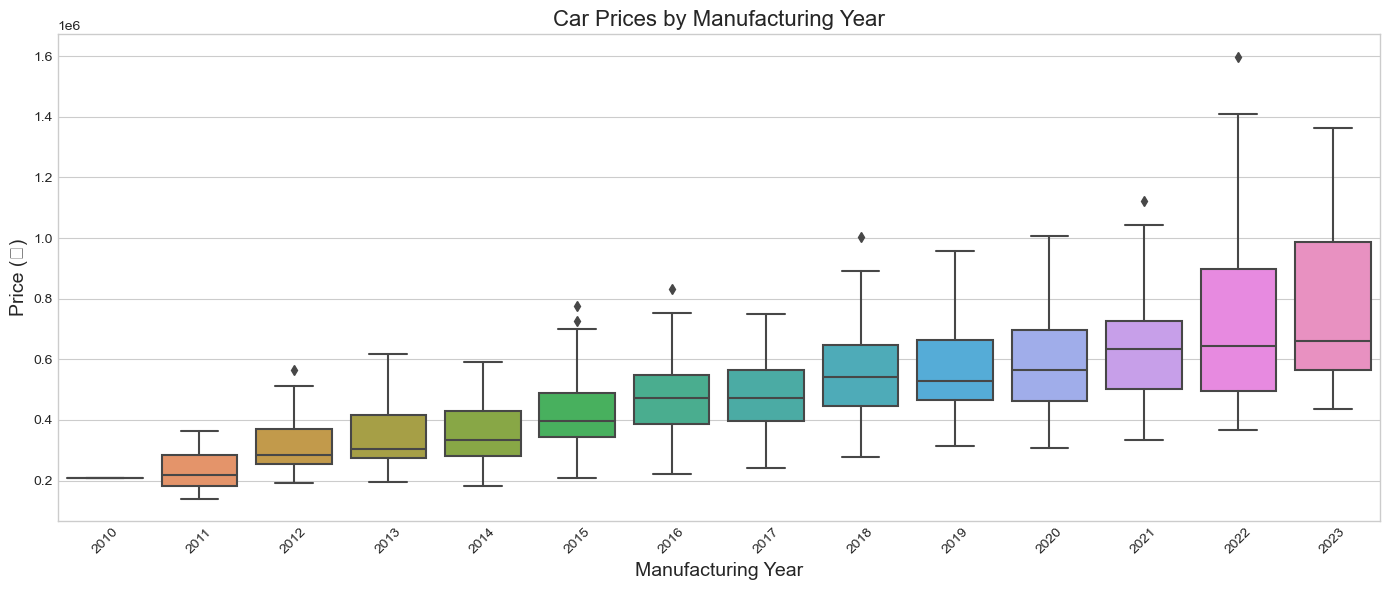

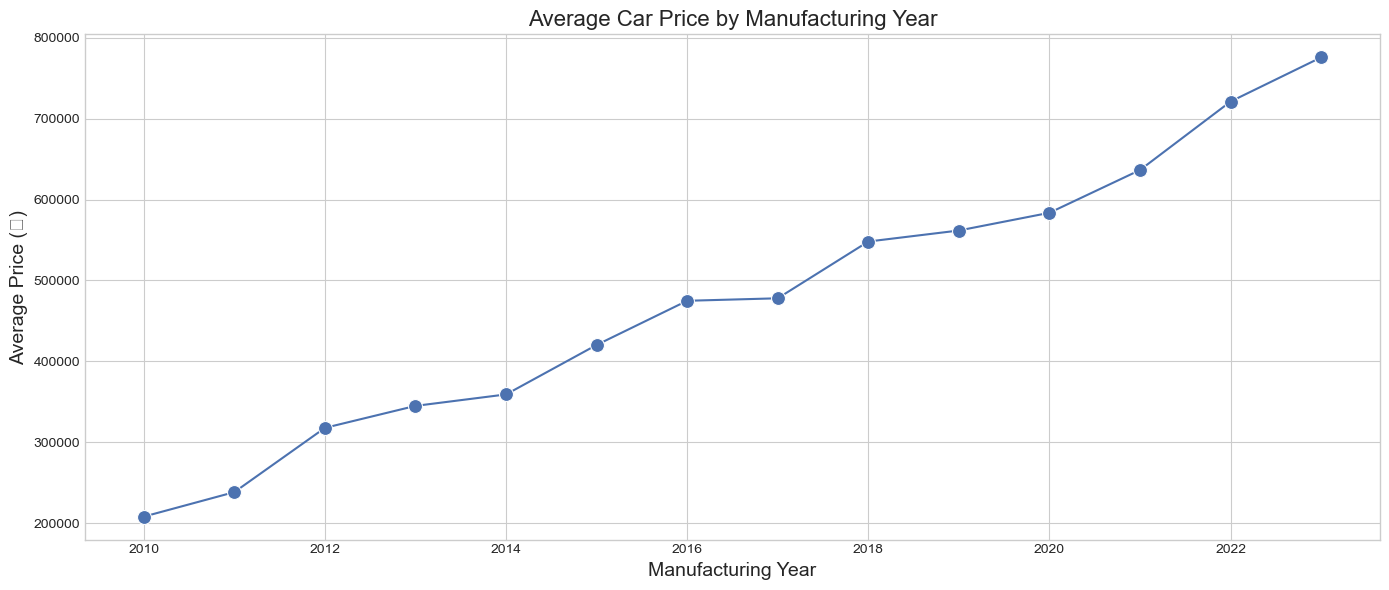

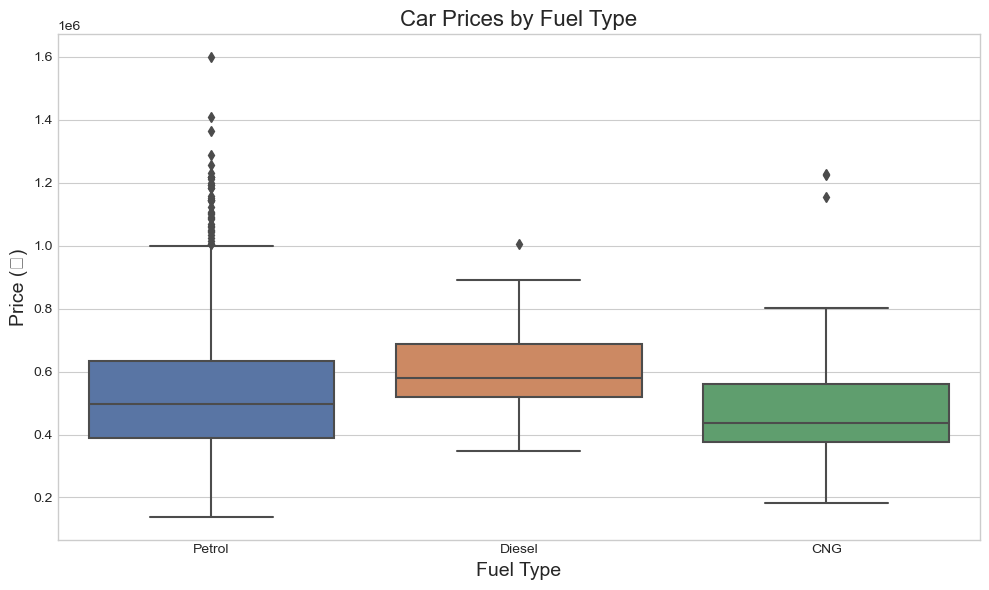


Count by Fuel Type:
Petrol    1264
CNG        109
Diesel      72
Name: Fuel type, dtype: int64

Average Price by Fuel Type:
Fuel type
Diesel    589111.111111
Petrol    527138.449367
CNG       475807.339450
Name: Price, dtype: float64


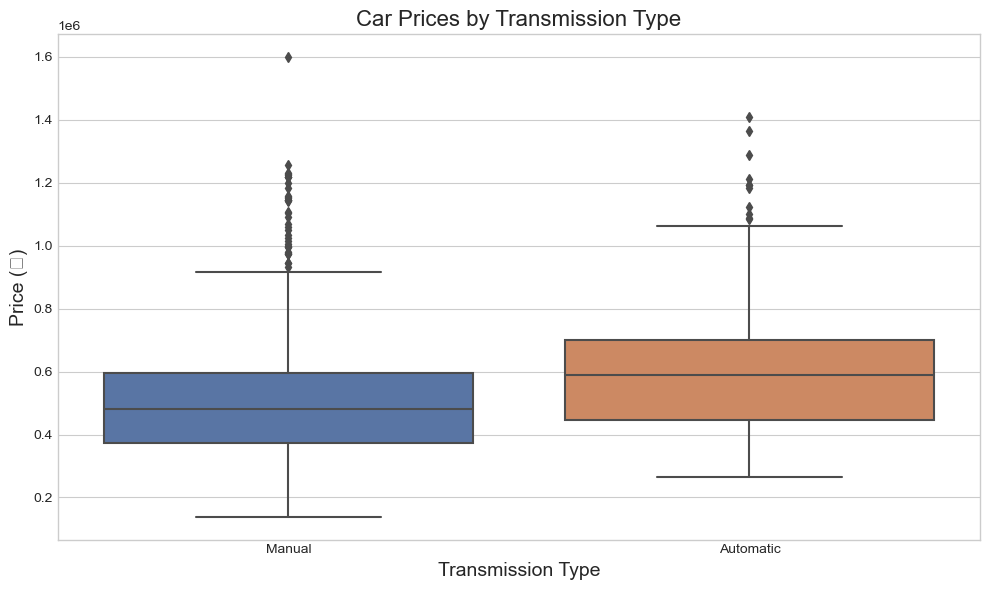


Count by Transmission Type:
Manual       1073
Automatic     372
Name: Transmission, dtype: int64

Average Price by Transmission Type:
Transmission
Automatic    601338.709677
Manual       500357.875116
Name: Price, dtype: float64

Percentage of Automatic: 25.7%
Percentage of Manual: 74.3%


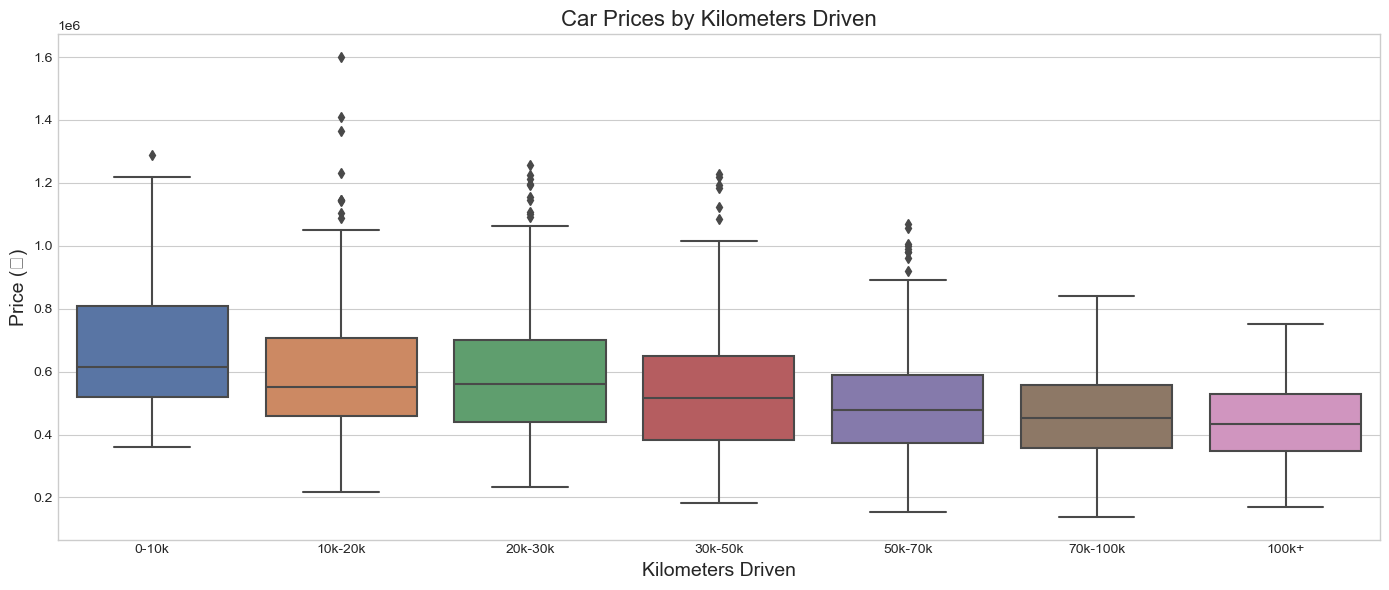

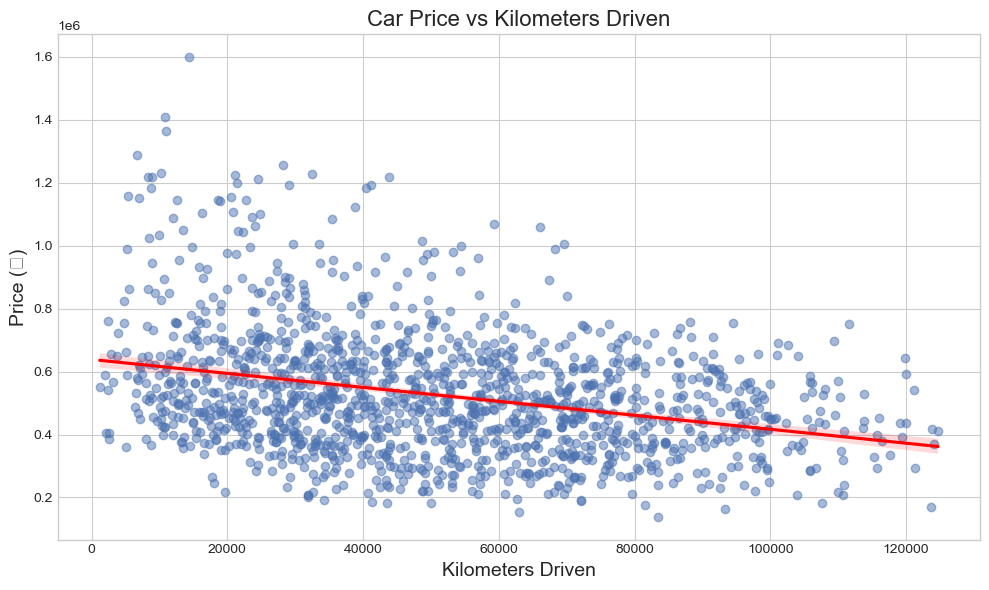

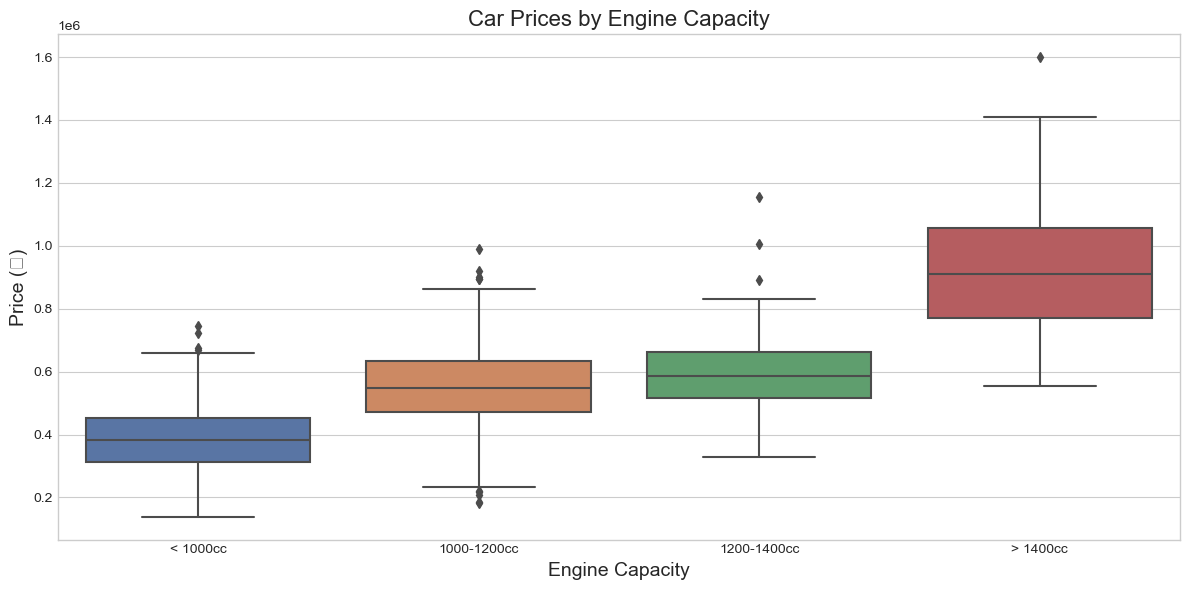


Average Price by Engine Capacity:
Engine Bucket
< 1000cc       388204.946996
1000-1200cc    553741.176471
1200-1400cc    589383.116883
> 1400cc       927823.076923
Name: Price, dtype: float64


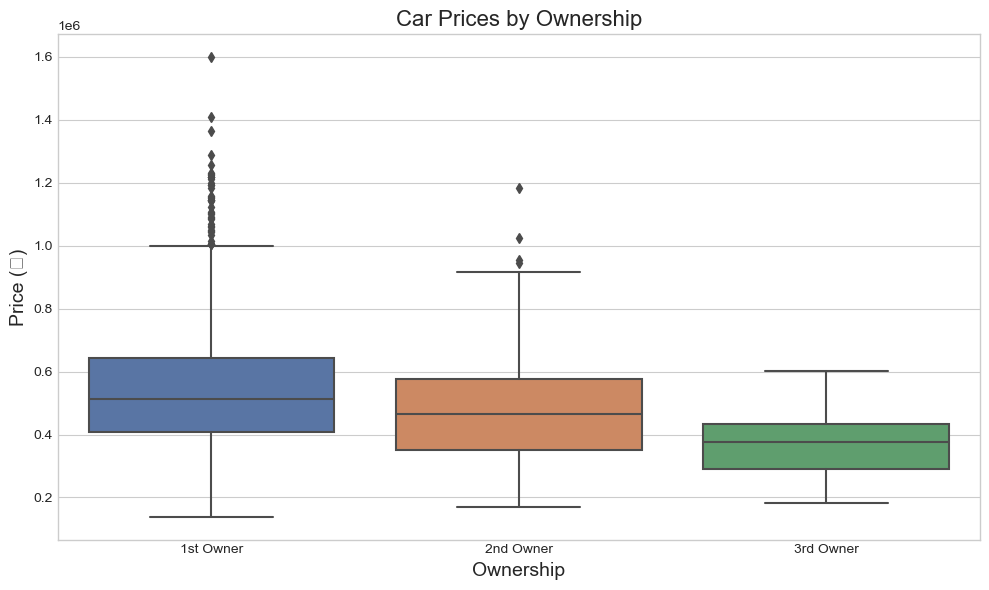


Count by Ownership:
1    1059
2     360
3      26
Name: Ownership, dtype: int64

Average Price by Ownership:
Ownership
1    547910.292729
2    474272.222222
3    369500.000000
Name: Price, dtype: float64


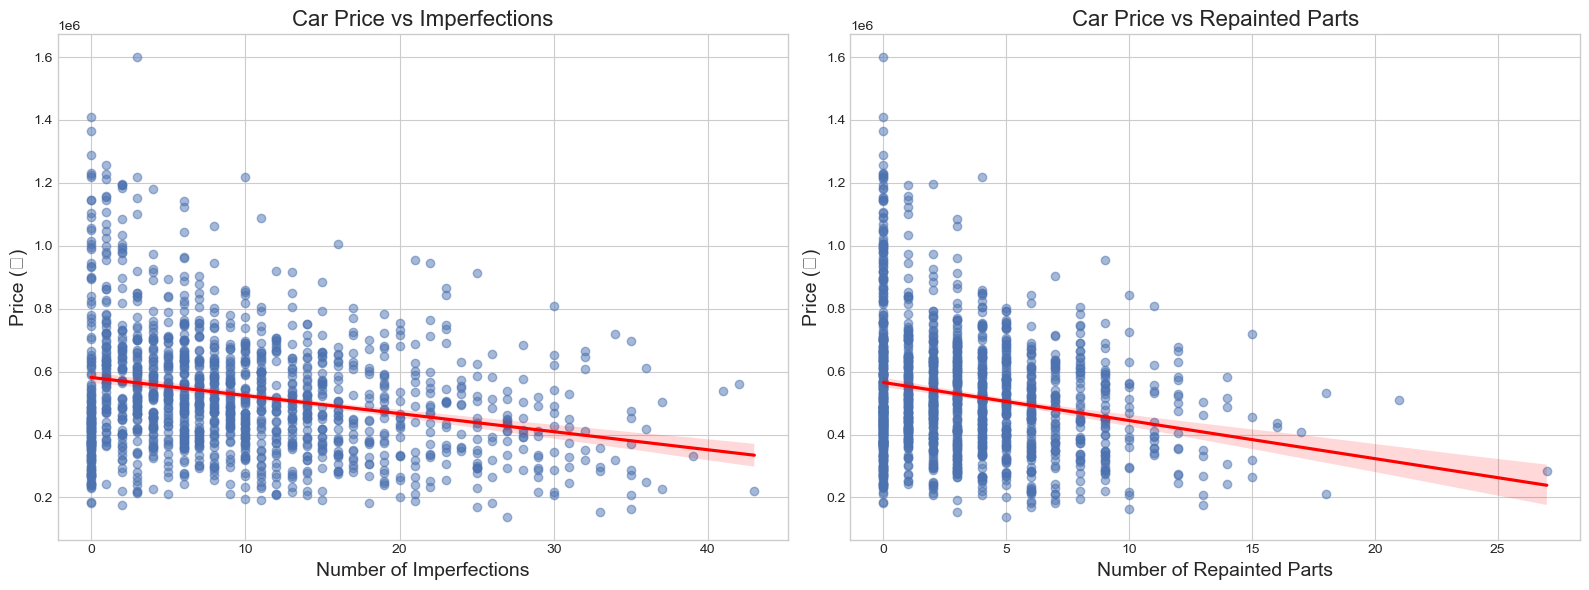

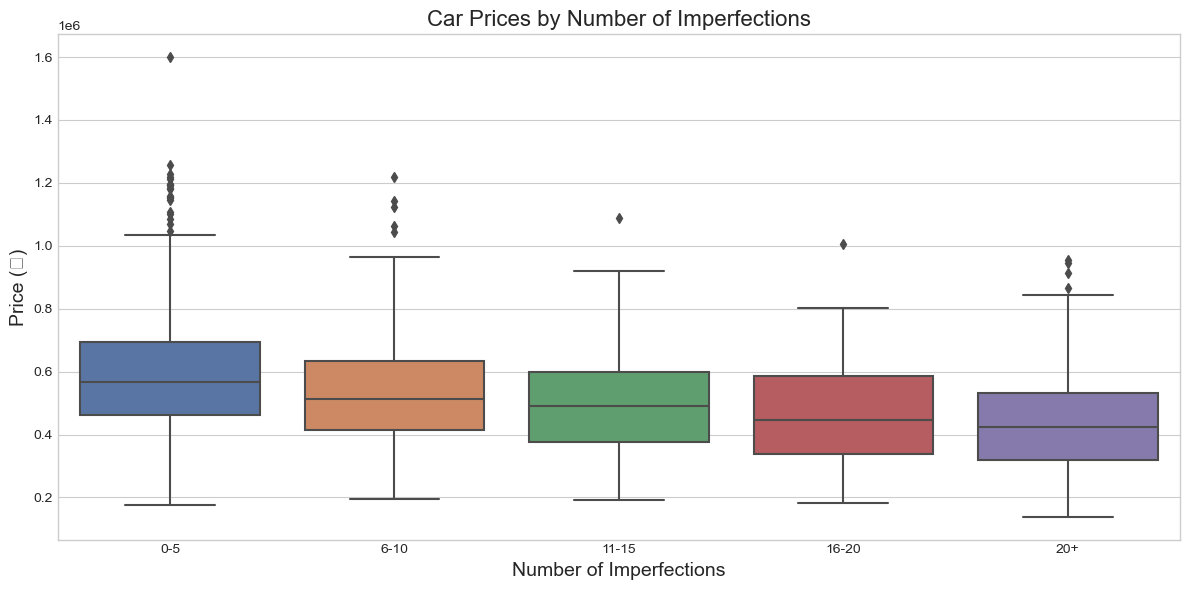

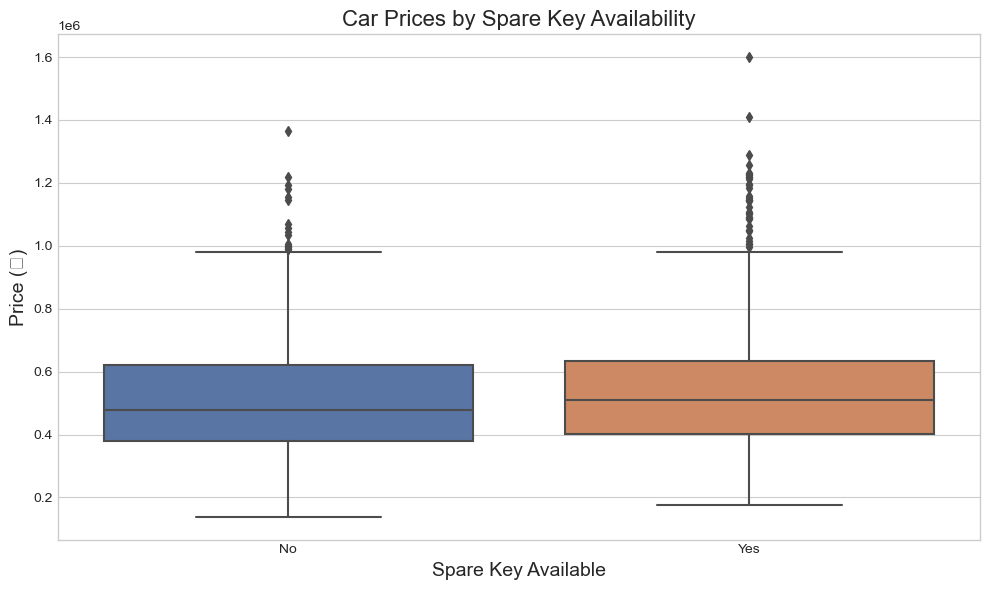


Count by Spare Key Availability:
Yes    908
No     537
Name: Spare key, dtype: int64

Average Price by Spare Key Availability:
Spare key
No     506497.206704
Yes    538098.017621
Name: Price, dtype: float64


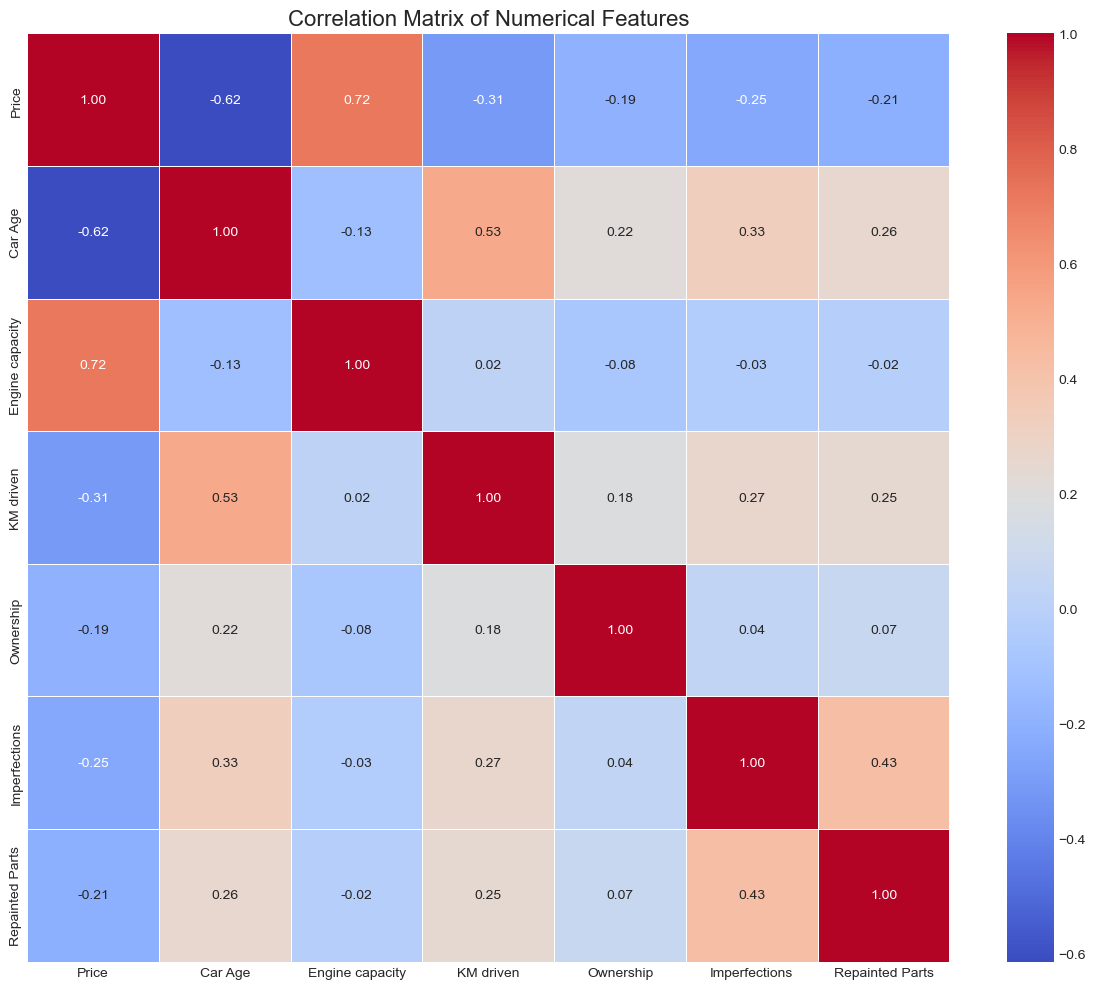


Correlation with Price:
Price              1.000000
Engine capacity    0.718906
Ownership         -0.193696
Repainted Parts   -0.207350
Imperfections     -0.245968
KM driven         -0.308925
Car Age           -0.615077
Name: Price, dtype: float64


In [2]:


# ### 3.1 Distribution of Car Prices

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: ₹{df["Price"].mean():,.0f}')
plt.axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: ₹{df["Price"].median():,.0f}')
plt.legend()
plt.tight_layout()
plt.savefig('price_distribution.png', dpi=300)
plt.show()

# ### 3.2 Price Distribution by Manufacturing Year

plt.figure(figsize=(14, 6))
sns.boxplot(x='Manufacturing_year', y='Price', data=df)
plt.title('Car Prices by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('price_by_year.png', dpi=300)
plt.show()

# Calculate average price by year
year_avg_price = df.groupby('Manufacturing_year')['Price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Manufacturing_year', y='Price', data=year_avg_price, marker='o', markersize=10)
plt.title('Average Car Price by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Average Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.savefig('avg_price_by_year.png', dpi=300)
plt.show()

# ### 3.3 Price by Fuel Type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_by_fuel.png', dpi=300)
plt.show()

# Count by fuel type
fuel_counts = df['Fuel type'].value_counts()
print("\nCount by Fuel Type:")
print(fuel_counts)

# Average price by fuel type
fuel_avg_price = df.groupby('Fuel type')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Fuel Type:")
print(fuel_avg_price)

# ### 3.4 Price by Transmission Type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_by_transmission.png', dpi=300)
plt.show()

# Count by transmission type
transmission_counts = df['Transmission'].value_counts()
print("\nCount by Transmission Type:")
print(transmission_counts)

# Average price by transmission type
transmission_avg_price = df.groupby('Transmission')['Price'].mean()
print("\nAverage Price by Transmission Type:")
print(transmission_avg_price)

# Percentage of automatic vs manual
print(f"\nPercentage of Automatic: {transmission_counts['Automatic']/len(df)*100:.1f}%")
print(f"Percentage of Manual: {transmission_counts['Manual']/len(df)*100:.1f}%")

# ### 3.5 Price by Kilometers Driven

# Create KM buckets for better visualization
km_bins = [0, 10000, 20000, 30000, 50000, 70000, 100000, 150000]
km_labels = ['0-10k', '10k-20k', '20k-30k', '30k-50k', '50k-70k', '70k-100k', '100k+']
df['KM Bucket'] = pd.cut(df['KM driven'], bins=km_bins, labels=km_labels)

plt.figure(figsize=(14, 6))
sns.boxplot(x='KM Bucket', y='Price', data=df)
plt.title('Car Prices by Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_by_km.png', dpi=300)
plt.show()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='KM driven', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Car Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_vs_km_scatter.png', dpi=300)
plt.show()

# ### 3.6 Price by Engine Capacity

# Create engine capacity buckets
engine_bins = [0, 1000, 1200, 1400, 1500]
engine_labels = ['< 1000cc', '1000-1200cc', '1200-1400cc', '> 1400cc']
df['Engine Bucket'] = pd.cut(df['Engine capacity'], bins=engine_bins, labels=engine_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine Bucket', y='Price', data=df)
plt.title('Car Prices by Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_by_engine.png', dpi=300)
plt.show()

# Average price by engine capacity
engine_avg_price = df.groupby('Engine Bucket')['Price'].mean()
print("\nAverage Price by Engine Capacity:")
print(engine_avg_price)

# ### 3.7 Price by Ownership

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ownership', y='Price', data=df)
plt.title('Car Prices by Ownership')
plt.xlabel('Ownership')
plt.ylabel('Price (₹)')
plt.xticks([0, 1, 2], ['1st Owner', '2nd Owner', '3rd Owner'])
plt.tight_layout()
plt.savefig('price_by_ownership.png', dpi=300)
plt.show()

# Count by ownership
ownership_counts = df['Ownership'].value_counts().sort_index()
print("\nCount by Ownership:")
print(ownership_counts)

# Average price by ownership
ownership_avg_price = df.groupby('Ownership')['Price'].mean()
print("\nAverage Price by Ownership:")
print(ownership_avg_price)

# ### 3.8 Price by Imperfections and Repainted Parts

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Imperfections', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Car Price vs Imperfections')
plt.xlabel('Number of Imperfections')
plt.ylabel('Price (₹)')

plt.subplot(1, 2, 2)
sns.regplot(x='Repainted Parts', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Car Price vs Repainted Parts')
plt.xlabel('Number of Repainted Parts')
plt.ylabel('Price (₹)')

plt.tight_layout()
plt.savefig('price_vs_imperfections.png', dpi=300)
plt.show()

# Create imperfection buckets
imperfection_bins = [0, 5, 10, 15, 20, 50]
imperfection_labels = ['0-5', '6-10', '11-15', '16-20', '20+']
df['Imperfection Bucket'] = pd.cut(df['Imperfections'], bins=imperfection_bins, labels=imperfection_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Imperfection Bucket', y='Price', data=df)
plt.title('Car Prices by Number of Imperfections')
plt.xlabel('Number of Imperfections')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_by_imperfections.png', dpi=300)
plt.show()

# ### 3.9 Price by Spare Key Availability

plt.figure(figsize=(10, 6))
sns.boxplot(x='Spare key', y='Price', data=df)
plt.title('Car Prices by Spare Key Availability')
plt.xlabel('Spare Key Available')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('price_by_spare_key.png', dpi=300)
plt.show()

# Count by spare key
spare_key_counts = df['Spare key'].value_counts()
print("\nCount by Spare Key Availability:")
print(spare_key_counts)

# Average price by spare key
spare_key_avg_price = df.groupby('Spare key')['Price'].mean()
print("\nAverage Price by Spare Key Availability:")
print(spare_key_avg_price)

# ### 3.10 Correlation Analysis

# Add car age
df['Car Age'] = 2023 - df['Manufacturing_year']

# Create correlation matrix
corr_columns = ['Price', 'Car Age', 'Engine capacity', 'KM driven', 
                'Ownership', 'Imperfections', 'Repainted Parts']
correlation_matrix = df[corr_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

print("\nCorrelation with Price:")
price_corr = correlation_matrix['Price'].sort_values(ascending=False)
print(price_corr)



In [3]:
# ## 4. Feature Engineering

# Create a copy of the dataframe for modeling
model_df = df.copy()

# Add car age
model_df['Car Age'] = 2023 - model_df['Manufacturing_year']

# Create dummy variables for categorical features
model_df = pd.get_dummies(model_df, columns=['Transmission', 'Fuel type', 'Spare key'], drop_first=True)

# Add polynomial features for engine capacity and age
model_df['Engine Capacity Squared'] = model_df['Engine capacity'] ** 2 / 1000000  # Scaled to prevent large values
model_df['Car Age Squared'] = model_df['Car Age'] ** 2

# Add interaction terms
model_df['Age X KM'] = model_df['Car Age'] * model_df['KM driven'] / 10000  # Scaled
model_df['Age X Imperfections'] = model_df['Car Age'] * model_df['Imperfections']

# Display the new features
print("\nNew features added:")
new_features = ['Car Age', 'Transmission_Manual', 'Fuel type_Diesel', 'Fuel type_Petrol', 'Spare key_Yes',
               'Engine Capacity Squared', 'Car Age Squared', 'Age X KM', 'Age X Imperfections']
print(model_df[new_features].head())




New features added:
   Car Age  Transmission_Manual  Fuel type_Diesel  Fuel type_Petrol  \
0        6                    1                 0                 1   
1        7                    1                 0                 1   
2        3                    1                 0                 1   
3        1                    0                 0                 1   
4        4                    1                 0                 1   

   Spare key_Yes  Engine Capacity Squared  Car Age Squared  Age X KM  \
0              0                 1.432809               36   15.5082   
1              1                 1.432809               49   38.8577   
2              0                 1.432809                9   14.1330   
3              1                 2.137444                1    3.5378   
4              1                 1.432809               16   36.7424   

   Age X Imperfections  
0                   36  
1                   84  
2                   12  
3                  

Training set size: 1156
Testing set size: 289

Linear Regression Model Performance:
RMSE: ₹79771.35
RMSE as % of mean price: 15.51%
R² Score: 0.8090

Model Coefficients:
                    Feature    Coefficient
10  Engine Capacity Squared  655698.352909
7          Fuel type_Diesel   70259.229633
11          Car Age Squared     858.960623
13      Age X Imperfections     245.479963
2                 KM driven      -0.236091
12                 Age X KM    -345.507913
1           Engine capacity    -747.553947
4             Imperfections   -2125.233073
5           Repainted Parts   -2151.112428
9             Spare key_Yes   -4409.478548
3                 Ownership  -11520.488807
8          Fuel type_Petrol  -37444.867483
0                   Car Age  -40300.077339
6       Transmission_Manual  -56917.536413


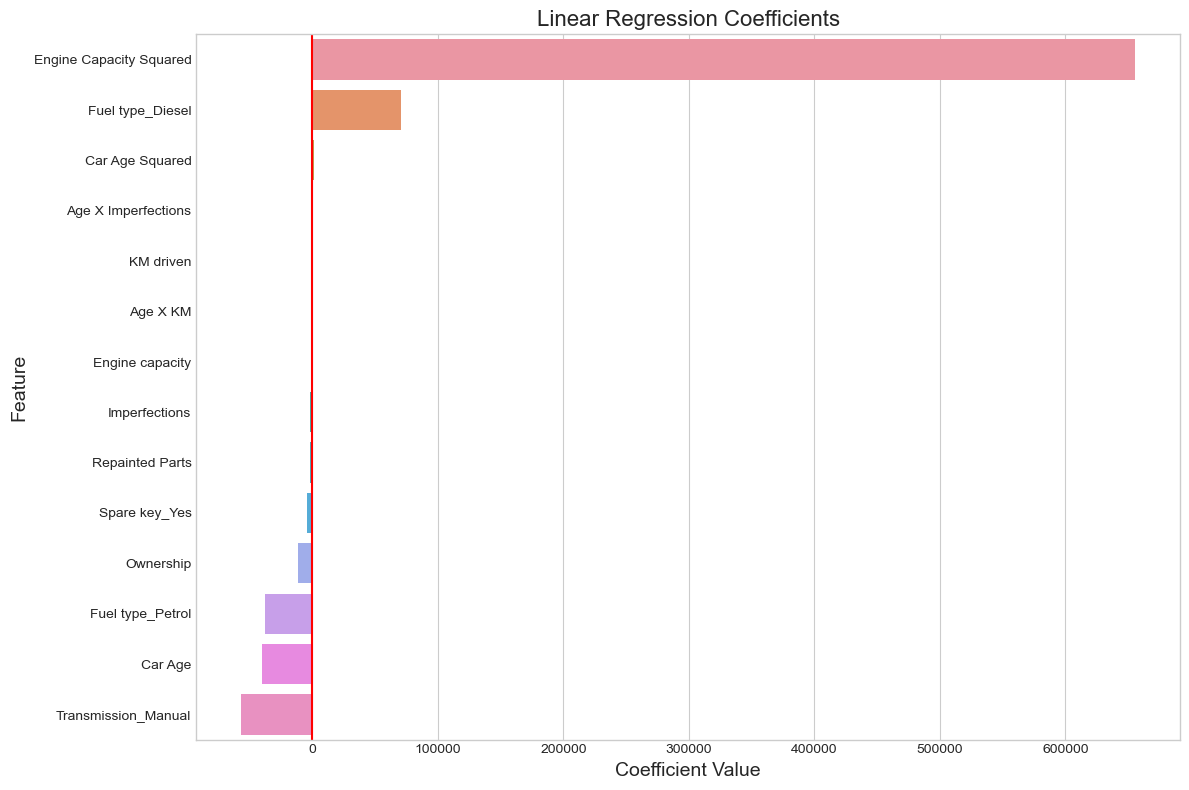


Feature Importance (Standardized Coefficients):
                    Feature     Importance
10  Engine Capacity Squared  253664.194407
1           Engine capacity  125647.183798
0                   Car Age  121028.633267
11          Car Age Squared   29679.316238
6       Transmission_Manual   24786.520086
4             Imperfections   18058.378319
13      Age X Imperfections   17838.999854
7          Fuel type_Diesel   15337.716863
8          Fuel type_Petrol   12178.739481
12                 Age X KM    8985.590770
5           Repainted Parts    7279.465799
2                 KM driven    6503.750065
3                 Ownership    5586.160353
9             Spare key_Yes    2128.173846


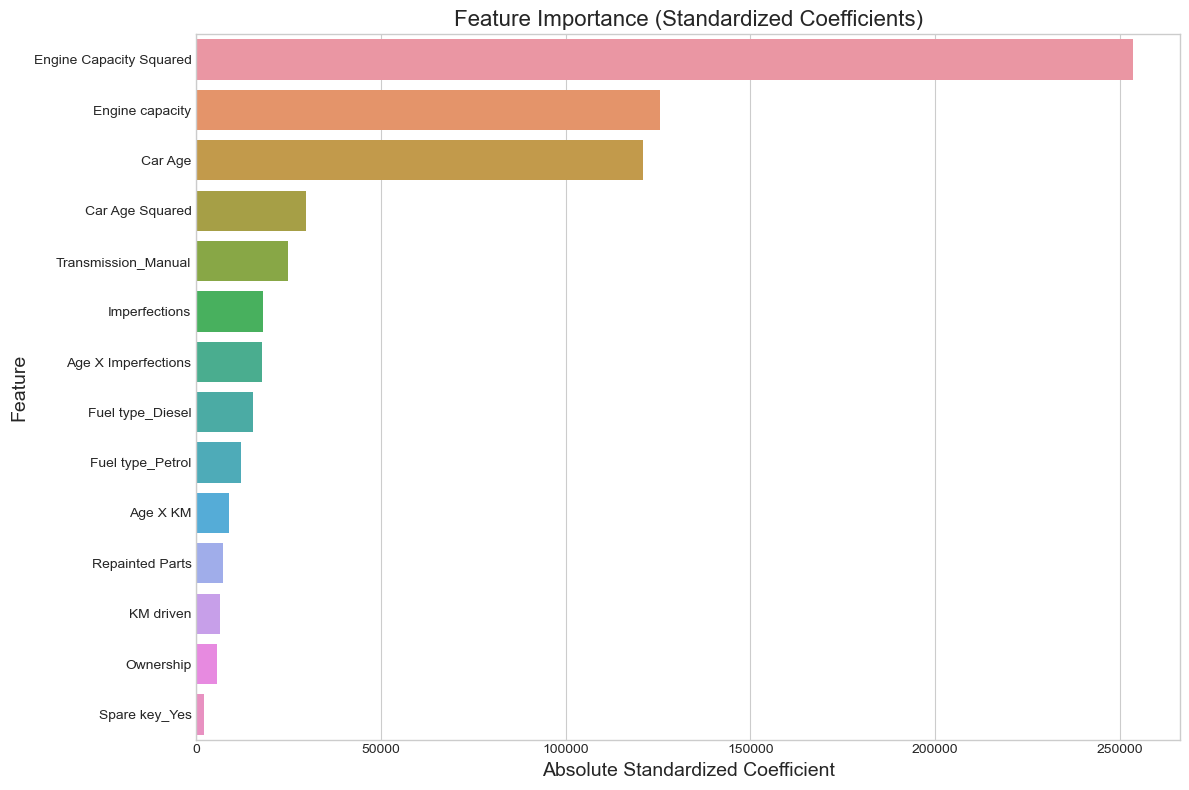

In [4]:
# ## 5. Model Building

# ### 5.1 Prepare Data for Modeling

# Select features for modeling
X_features = ['Car Age', 'Engine capacity', 'KM driven', 'Ownership', 
              'Imperfections', 'Repainted Parts', 'Transmission_Manual',
              'Fuel type_Diesel', 'Fuel type_Petrol', 'Spare key_Yes',
              'Engine Capacity Squared', 'Car Age Squared', 'Age X KM', 'Age X Imperfections']

X = model_df[X_features]
y = model_df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# ### 5.2 Linear Regression Model

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print(f"RMSE: ₹{rmse:.2f}")
print(f"RMSE as % of mean price: {rmse/y_test.mean()*100:.2f}%")
print(f"R² Score: {r2:.4f}")

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': X_features,
    'Coefficient': lr_model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)

# Visualize coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()
plt.savefig('regression_coefficients.png', dpi=300)
plt.show()

# ### 5.3 Feature Importance (Standardized Coefficients)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on standardized features
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)

# Calculate feature importance as absolute standardized coefficients
feature_importance = pd.DataFrame({
    'Feature': X_features,
    'Importance': np.abs(lr_model_scaled.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance (Standardized Coefficients):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Standardized Coefficients)')
plt.xlabel('Absolute Standardized Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()




Statsmodels OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     435.0
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:00:45   Log-Likelihood:                -14680.
No. Observations:                1156   AIC:                         2.939e+04
Df Residuals:                    1141   BIC:                         2.947e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------


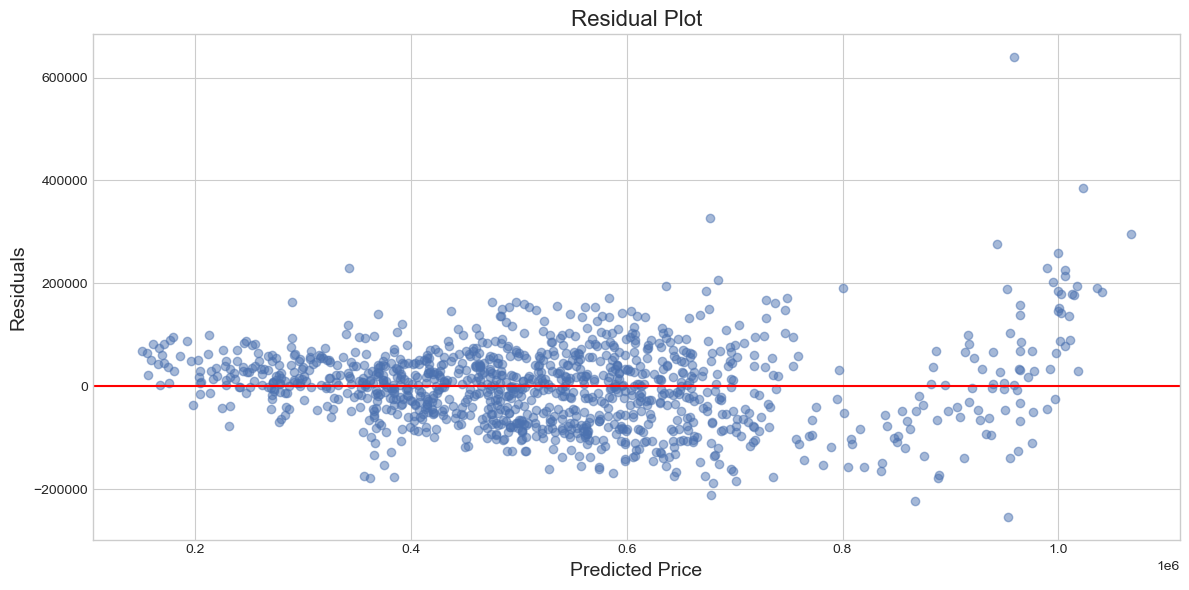

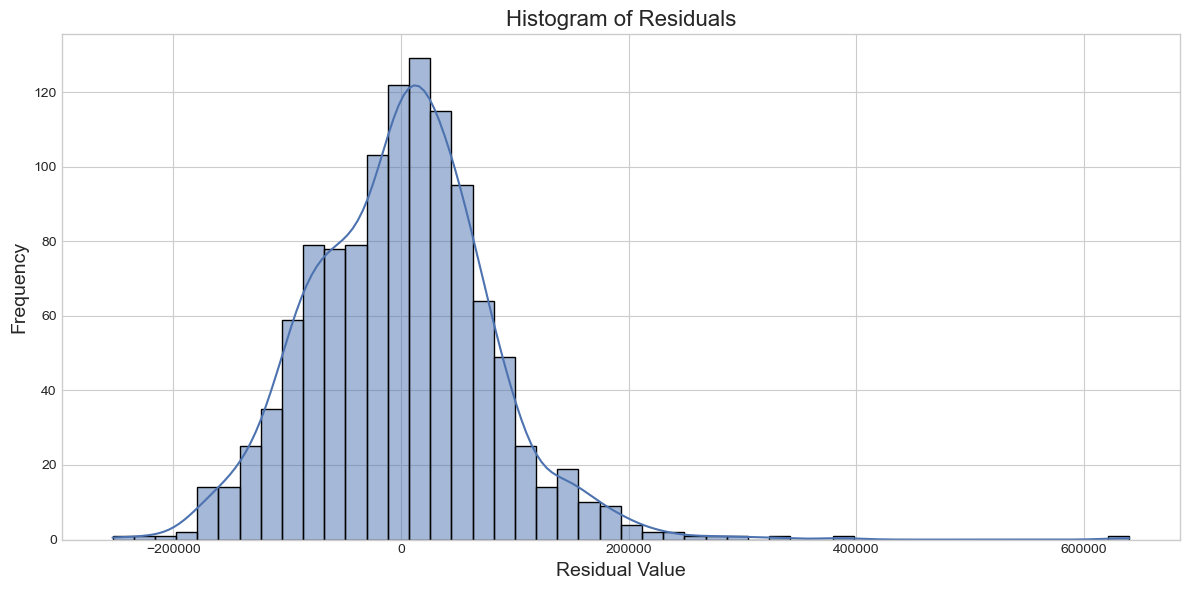


Variance Inflation Factors (VIF):
                    Feature          VIF
0                     const  1311.425061
11  Engine Capacity Squared   115.640526
2           Engine capacity   115.590171
12          Car Age Squared    23.667899
13                 Age X KM    20.274406
1                   Car Age    15.627018
3                 KM driven    10.012725
14      Age X Imperfections     9.712862
5             Imperfections     7.062087
8          Fuel type_Diesel     1.770404
9          Fuel type_Petrol     1.759220
6           Repainted Parts     1.264244
7       Transmission_Manual     1.110485
4                 Ownership     1.082054
10            Spare key_Yes     1.025410


In [5]:
# ### 5.4 Statsmodels for Detailed Statistical Analysis

# Add constant to X for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train the model
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Display summary
print("\nStatsmodels OLS Summary:")
print(sm_model.summary())

# ### 5.5 Evaluate Using Residual Analysis

# Calculate residuals
y_pred_train = sm_model.predict(X_train_sm)
residuals = y_train - y_pred_train

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.tight_layout()
plt.savefig('residual_plot.png', dpi=300)
plt.show()

# Histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('residual_histogram.png', dpi=300)
plt.show()

# ### 5.6 Check for Multicollinearity

# Calculate Variance Inflation Factor (VIF)
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data.sort_values('VIF', ascending=False))



In [6]:
# ## 6. Price Prediction for Different Car Scenarios

# Create sample scenarios
scenarios = pd.DataFrame({
    'Scenario': ['New Low Mileage Car', 'Mid-Range Car', 'Old High Mileage Car'],
    'Manufacturing_year': [2022, 2017, 2013],
    'Engine capacity': [1400, 1200, 1000],
    'KM driven': [10000, 50000, 90000],
    'Ownership': [1, 1, 2],
    'Imperfections': [2, 8, 15],
    'Repainted Parts': [0, 2, 5],
    'Transmission': ['Automatic', 'Manual', 'Manual'],
    'Fuel type': ['Petrol', 'Petrol', 'Petrol'],
    'Spare key': ['Yes', 'Yes', 'No']
})

# Feature engineering for scenarios
scenarios['Car Age'] = 2023 - scenarios['Manufacturing_year']
scenarios['Transmission_Manual'] = scenarios['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)
scenarios['Fuel type_Diesel'] = scenarios['Fuel type'].apply(lambda x: 1 if x == 'Diesel' else 0)
scenarios['Fuel type_Petrol'] = scenarios['Fuel type'].apply(lambda x: 1 if x == 'Petrol' else 0)
scenarios['Spare key_Yes'] = scenarios['Spare key'].apply(lambda x: 1 if x == 'Yes' else 0)
scenarios['Engine Capacity Squared'] = scenarios['Engine capacity'] ** 2 / 1000000
scenarios['Car Age Squared'] = scenarios['Car Age'] ** 2
scenarios['Age X KM'] = scenarios['Car Age'] * scenarios['KM driven'] / 10000
scenarios['Age X Imperfections'] = scenarios['Car Age'] * scenarios['Imperfections']

# Prepare features for prediction
scenario_features = scenarios[X_features]

# Make predictions
scenarios['Predicted Price'] = lr_model.predict(scenario_features)

# Display results
print("\nPrice Predictions for Different Car Scenarios:")
scenario_results = scenarios[['Scenario', 'Manufacturing_year', 'Engine capacity', 
                             'KM driven', 'Transmission', 'Predicted Price']]
scenario_results['Predicted Price'] = scenario_results['Predicted Price'].round(0).astype(int)
print(scenario_results)




Price Predictions for Different Car Scenarios:
               Scenario  Manufacturing_year  Engine capacity  KM driven  \
0   New Low Mileage Car                2022             1400      10000   
1         Mid-Range Car                2017             1200      50000   
2  Old High Mileage Car                2013             1000      90000   

  Transmission  Predicted Price  
0    Automatic           949418  
1       Manual           504387  
2       Manual           225587  


In [7]:
# ## 7. Key Findings and Conclusion

print("\n=====================================================")
print("Key Factors Affecting Used Car Prices (in order of importance):")
print("=====================================================")

for index, row in feature_importance.head(6).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")

print("\nModel Performance:")
print(f"- R² Score: {r2:.4f} (explains {r2*100:.1f}% of price variation)")
print(f"- RMSE: ₹{rmse:.2f} ({rmse/y_test.mean()*100:.2f}% of mean price)")

print("\nKey Observations:")
print("1. Engine capacity is the most significant determinant of car price")
print("2. Car age has a strong negative effect on price (newer cars command premium prices)")
print("3. Automatic transmission adds significant value compared to manual transmission")
print("4. Diesel cars are priced higher than petrol or CNG vehicles")
print("5. Higher mileage (KM driven) reduces car value")
print("6. Physical condition (imperfections and repainted parts) has a moderate impact on price")
print("7. First-owner cars have higher value than those with multiple previous owners")


Key Factors Affecting Used Car Prices (in order of importance):
- Engine Capacity Squared: 253664.1944
- Engine capacity: 125647.1838
- Car Age: 121028.6333
- Car Age Squared: 29679.3162
- Transmission_Manual: 24786.5201
- Imperfections: 18058.3783

Model Performance:
- R² Score: 0.8090 (explains 80.9% of price variation)
- RMSE: ₹79771.35 (15.51% of mean price)

Key Observations:
1. Engine capacity is the most significant determinant of car price
2. Car age has a strong negative effect on price (newer cars command premium prices)
3. Automatic transmission adds significant value compared to manual transmission
4. Diesel cars are priced higher than petrol or CNG vehicles
5. Higher mileage (KM driven) reduces car value
6. Physical condition (imperfections and repainted parts) has a moderate impact on price
7. First-owner cars have higher value than those with multiple previous owners
